# Social Evolution Simulations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Barebones Model

This model is a society of $n$ many people and the society lives over time horizon $T$. Here, we represent the wealth of the population at time $t\in \{1,2,\ldots,T\}$ as a vector $\mathbf{x_t} = \begin{pmatrix}x^1_t & \ldots &x^n_t \end{pmatrix}'$. To summarize this society's features at any point in time $t$, we calculate both the gini index and aggregate wealth of the population (as the sum $x^{agg}_t = \sum_{i=1}^n x^i_t$). 

The main equation that dictates the motion of this society is $x^k_t = \max\{0, x^k_{t-1} + \epsilon^k_t\}$, it says that at time $t$, an individual $k$'s wealth is determined by the max between 0 and their past wealth plus a shock that has a gaussian distribution.

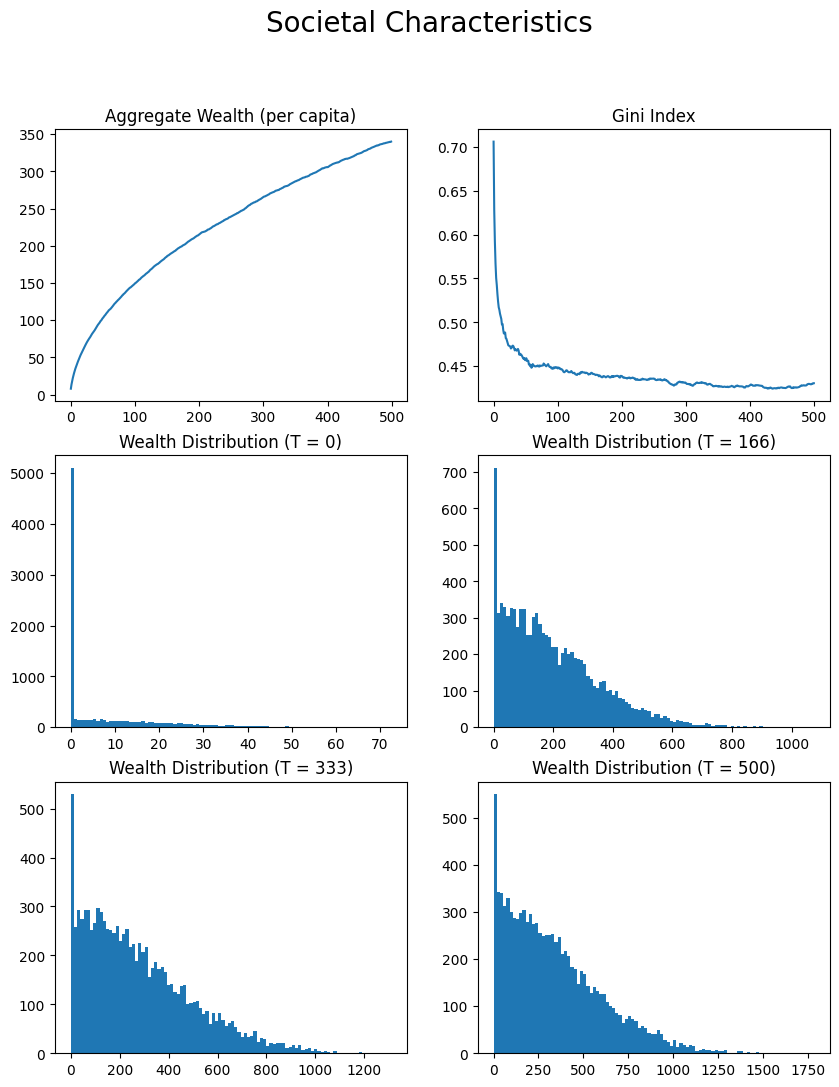

In [9]:
# Population of the society
n = 10000

# Time Horizon
T = 500

# Wealth objects
wealth_dist = np.zeros((n,T))
wealth_agg = np.zeros(T)
min_wealth = np.zeros(n)

# Wealth Shock Parameters
w_sh_mean = 0
w_sh_std = 20

# Socioeconomic satisfaction
gini = np.zeros(T)

# Gini Index Calculation Helper
def gini_calc(x):
    sorted_x = np.sort(x)
    n = len(x)
    cumx = np.cumsum(sorted_x, dtype=float)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

# Produce and store the shocks
w_sh = np.random.normal(w_sh_mean, w_sh_std, size = (n, T))

# Running the simulation
for i in range(T):
    if i == 0:
        wealth_dist[:, i] = np.maximum(w_sh[:, i], min_wealth)
    else:
        wealth_dist[:, i] = np.maximum(wealth_dist[:, i-1] + w_sh[:, i], min_wealth)
    wealth_agg[i] = sum(wealth_dist[:, i])
    gini[i] = gini_calc(wealth_dist[:, i])

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

xs = range(T)

fig.suptitle("Societal Characteristics", fontsize=20)

axs[0,0].plot(xs, wealth_agg / n)
axs[0,1].plot(xs, gini)

axs[0,0].set_title('Aggregate Wealth (per capita)')
axs[0,1].set_title('Gini Index')

axs[1,0].hist(wealth_dist[:, 0], bins = int(n/100))
axs[1,0].set_title("Wealth Distribution (T = " + str(0) + ")")

axs[1,1].hist(wealth_dist[:, int(T/3)], bins = int(n/100))
axs[1,1].set_title("Wealth Distribution (T = " + str(int(T/3)) + ")")

axs[2,0].hist(wealth_dist[:, int(2*T/3)], bins = int(n/100))
axs[2,0].set_title("Wealth Distribution (T = " + str(int(2*T/3)) + ")")

axs[2,1].hist(wealth_dist[:, T-1], bins = int(n/100))
axs[2,1].set_title("Wealth Distribution (T = " + str(T) + ")")

plt.show()

This is a pretty simple setup but I feel like it yeilds some really interesting insights. The first is that absent any external mechanisms, inequality in this model (as measure by the gini index) starts out very high and converges to some rate around $0.43$. This trend is also consistent over multiple runs of the simulation as well. It's hard to tell if this long-term trend is something that we can see in the data, however, since most countries didn't start tracking data relevant to make these gini calculations until at least the 1960s. The society depicted here, is of course nothing close to reality. The wealth distributions are not a realistic picture of what happens for the US (as there would be some outliers that are far out to the right). To be clear, the wealth distributions we see are somewhat mechanically derived from the fact that individuals are hit with shocks from the same normal distribution and are bounded from having negative weight. Let's change up the next model to try to extract some more interesting dynamics.

## Adding Societal Revolutions

Let's add on societal revolutions to model above. Specifically let's say that when the gini index stays above 0.45 for 10 periods or longer, the society goes through a revolution where each individual's wealth is reset to an equal portion of 80% of the aggregate wealth from before the revolution.

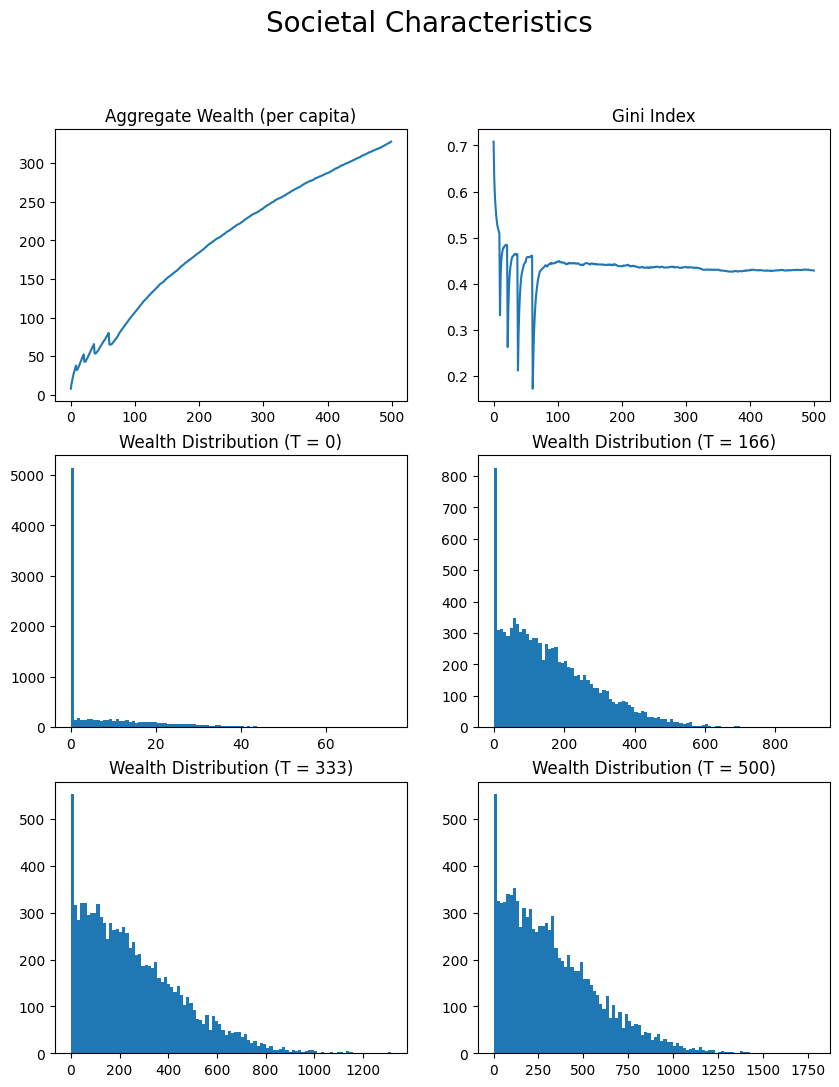

In [10]:
# Population of the society
n = 10000

# Time Horizon
T = 500

# Wealth objects
wealth_dist = np.zeros((n,T))
wealth_agg = np.zeros(T)
min_wealth = np.zeros(n)

# Wealth Shock Parameters
w_sh_mean = 0
w_sh_std = 20

# Socioeconomic satisfaction
gini = np.zeros(T)

# Gini Index Calculation Helper
def gini_calc(x):
    sorted_x = np.sort(x)
    n = len(x)
    cumx = np.cumsum(sorted_x, dtype=float)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    
# Produce and store the shocks
w_sh = np.random.normal(w_sh_mean, w_sh_std, size = (n, T))

# Revolution Variables
revolution_counter = 0
revolution_sentiment = 0

# Running the simulation
for i in range(T):
    if i == 0:
        wealth_dist[:, i] = np.maximum(w_sh[:, i], min_wealth)
    else:
        wealth_dist[:, i] = np.maximum(wealth_dist[:, i-1] + w_sh[:, i], min_wealth)
    wealth_agg[i] = sum(wealth_dist[:, i])
    gini[i] = gini_calc(wealth_dist[:, i])

    if gini[i] >= 0.45:
        revolution_sentiment += 1
    else:
        revolution_sentiment = 0

    if revolution_sentiment >= 10:
        wealth_agg[i] = wealth_agg[i] * 0.8
        wealth_dist[:, i] = (wealth_agg[i]/n) * np.ones(n)

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

xs = range(T)

fig.suptitle("Societal Characteristics", fontsize=20)

axs[0,0].plot(xs, wealth_agg / n)
axs[0,1].plot(xs, gini)

axs[0,0].set_title('Aggregate Wealth (per capita)')
axs[0,1].set_title('Gini Index')

axs[1,0].hist(wealth_dist[:, 0], bins = int(n/100))
axs[1,0].set_title("Wealth Distribution (T = " + str(0) + ")")

axs[1,1].hist(wealth_dist[:, int(T/3)], bins = int(n/100))
axs[1,1].set_title("Wealth Distribution (T = " + str(int(T/3)) + ")")

axs[2,0].hist(wealth_dist[:, int(2*T/3)], bins = int(n/100))
axs[2,0].set_title("Wealth Distribution (T = " + str(int(2*T/3)) + ")")

axs[2,1].hist(wealth_dist[:, T-1], bins = int(n/100))
axs[2,1].set_title("Wealth Distribution (T = " + str(T) + ")")

plt.show()

## Wealth Transfers

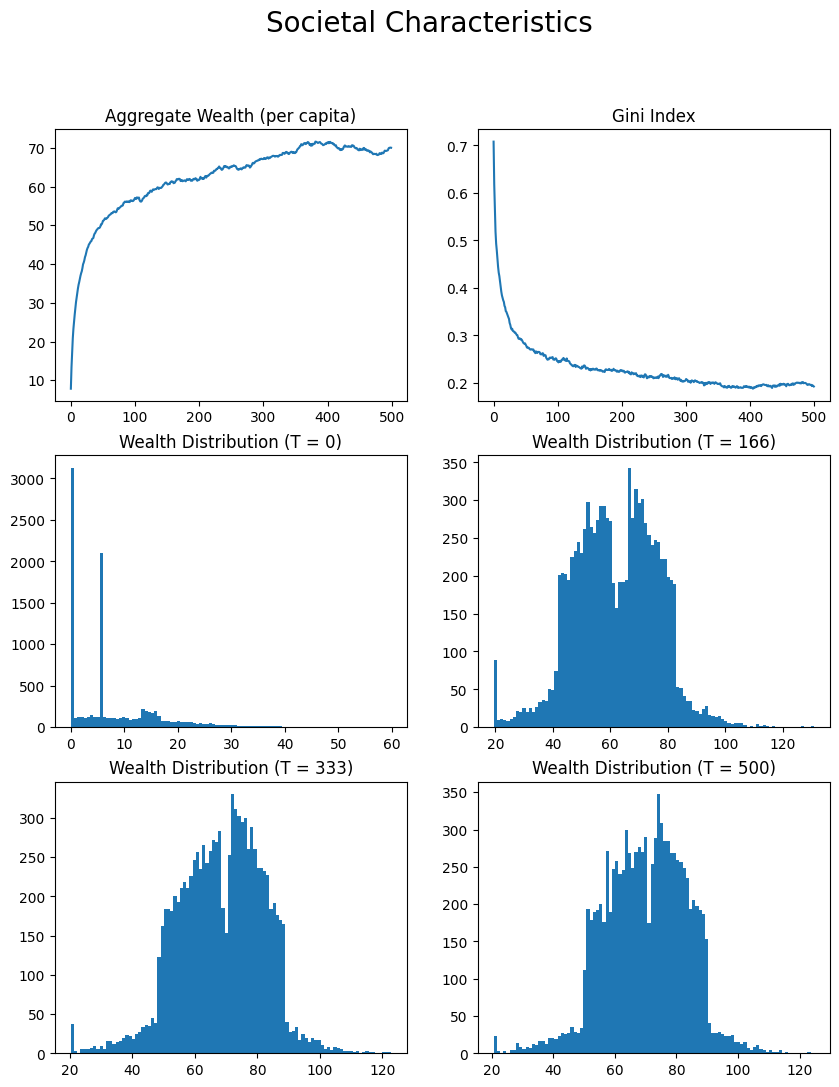

In [14]:
# Population of the society
n = 10000

# Time Horizon
T = 500

# Wealth objects
wealth_dist = np.zeros((n,T))
wealth_agg = np.zeros(T)
min_wealth = np.zeros(n)

# Wealth Shock Parameters
w_sh_mean = 0
w_sh_std = 20

# Socioeconomic satisfaction
gini = np.zeros(T)

# Gini Index Calculation Helper
def gini_calc(x):
    sorted_x = np.sort(x)
    n = len(x)
    cumx = np.cumsum(sorted_x, dtype=float)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    
# Produce and store the shocks
w_sh = np.random.normal(w_sh_mean, w_sh_std, size = (n, T))

# Revolution Variables
revolution_counter = 0
revolution_sentiment = 0

# Running the simulation
for i in range(T):
    if i == 0:
        wealth_dist[:, i] = np.maximum(w_sh[:, i], min_wealth)
    else:
        wealth_dist[:, i] = np.maximum(wealth_dist[:, i-1] + w_sh[:, i], min_wealth)
    wealth_agg[i] = sum(wealth_dist[:, i])
    gini[i] = gini_calc(wealth_dist[:, i])

    # Rank the wealth from low to high
    ranked_wealth_dist = np.argsort(wealth_dist[:, i])
    tot_redist = 0
    for rich in range(int(n * 0.8), n):
        rich_idx = ranked_wealth_dist[rich]
        tot_redist += wealth_dist[rich_idx, i] * 0.2
        wealth_dist[rich_idx, i] = wealth_dist[rich_idx, i] * 0.8
    
    for poor in range(int(n * 0.2)):
        poor_idx = ranked_wealth_dist[poor]
        wealth_dist[poor_idx, i] += tot_redist / (int(n * 0.2))
    
    if gini[i] >= 0.45:
        revolution_sentiment += 1
    else:
        revolution_sentiment = 0

    if revolution_sentiment >= 10:
        wealth_agg[i] = wealth_agg[i] * 0.8
        wealth_dist[:, i] = (wealth_agg[i]/n) * np.ones(n)

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

xs = range(T)

fig.suptitle("Societal Characteristics", fontsize=20)

axs[0,0].plot(xs, wealth_agg / n)
axs[0,1].plot(xs, gini)

axs[0,0].set_title('Aggregate Wealth (per capita)')
axs[0,1].set_title('Gini Index')

axs[1,0].hist(wealth_dist[:, 0], bins = int(n/100))
axs[1,0].set_title("Wealth Distribution (T = " + str(0) + ")")

axs[1,1].hist(wealth_dist[:, int(T/3)], bins = int(n/100))
axs[1,1].set_title("Wealth Distribution (T = " + str(int(T/3)) + ")")

axs[2,0].hist(wealth_dist[:, int(2*T/3)], bins = int(n/100))
axs[2,0].set_title("Wealth Distribution (T = " + str(int(2*T/3)) + ")")

axs[2,1].hist(wealth_dist[:, T-1], bins = int(n/100))
axs[2,1].set_title("Wealth Distribution (T = " + str(T) + ")")

plt.show()

## Some thoughts about incorporating productivity